In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cmocean
import math
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

# Mooring data

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')

E3 = open_s3fs('mooring_nord_svalbard/NL_E3.nc')
W3 = open_s3fs('mooring_nord_svalbard/NL_W3.nc')
E2 = open_s3fs('mooring_nord_svalbard/NL_E2.nc') 
W2 = open_s3fs('mooring_nord_svalbard/NL_W2.nc')
E1 = open_s3fs('mooring_nord_svalbard/NL_E1.nc') 
W1 = open_s3fs('mooring_nord_svalbard/NL_W1.nc') 

In [6]:
grid = open_s3fs('smooth_grid_karen.nc')

In [7]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.48733,80.03876),
          (5.56333,79.44093),
          (24.00000,81.24925),
          (18.29052,81.10979),
          (23.59853,81.30813),
          (18.23789,81.22686),
          (23.59982,81.35453),
          (18.23730,81.27356)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (923, 157), 
            (930, 149),
            (932, 147),
            (929, 142),
            (774, 344+6),
            (766, 358+6),
            (773, 346+6),
            (334, 978),
            (334, 978),
            (334, 978),
            (817, 425), # new moorings from here
            (800, 405),
            (810, 425),
            (802, 413),
            (810, 427),
            (797, 414)]
vec_l = [np.array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
         np.array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
         np.array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
         np.array([[ 0.86834446, 0.49596158],
        [-0.49596158,  0.86834446]]),
         np.array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
         np.array([[ 0.86822067, -0.49617826],
        [ 0.49617826,  0.86822067]]),
         np.array([[ 0.76994574, -0.63810937],
        [ 0.63810937,  0.76994574]]),
         np.array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
         np.array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
         np.array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
         np.array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
         np.array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
         np.array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]]),
         np.array([[ 0.9975322 , -0.07021048],
        [ 0.07021048,  0.9975322 ]]),
         np.array([[ 0.9732993 , -0.22953971],
        [ 0.22953971,  0.9732993 ]]),
        np.array([[ 0.99975175, -0.0222807 ],
        [ 0.0222807 ,  0.99975175]]),
        np.array([[ 0.84114404, -0.54081116],
        [ 0.54081116,  0.84114404]]),
        np.array([[ 0.99493596,  0.10051086],
        [-0.10051086,  0.99493596]]),
         np.array([[ 0.98863153, -0.15035855],
        [ 0.15035855,  0.98863153]])]

c_list = ['gold', 'orangered', 'g',
          'r', 'm', 'y','tab:orange',
          'tab:pink', 'limegreen', 'maroon', 
          'dodgerblue', 'c', 'peru','deeppink','darkviolet','forestgreen','bisque','coral','palegreen']

In [17]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()
v13 = d13.VCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()
u15 = d15.UCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()
v15 = d15.VCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()
u17 = d17.UCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()
v17 = d17.VCUR.fillna(0).squeeze(axis=0).rolling(TIME=5).mean()

# Lofoten
ub = MB.u.fillna(0).rolling(TIME=5).mean()
vb = MB.v.fillna(0).rolling(TIME=5).mean()
uw = MW.u.fillna(0).rolling(TIME=5).mean()
vw = MW.v.fillna(0).rolling(TIME=5).mean()
un = MN.u.fillna(0).rolling(TIME=5).mean()
vn = MN.v.fillna(0).rolling(TIME=5).mean()
us = MS.u.fillna(0).rolling(TIME=5).mean()
vs = MS.v.fillna(0).rolling(TIME=5).mean()

# Yermark
u1 = y1.u.fillna(0).rolling(TIME=5).mean()
v1 = y1.v.fillna(0).rolling(TIME=5).mean()
u2 = y2.u.fillna(0).rolling(TIME=5).mean()
v2 = y2.v.fillna(0).rolling(TIME=5).mean()
u3 = y3.u.fillna(0).rolling(TIME=5).mean()
v3 = y3.v.fillna(0).rolling(TIME=5).mean()

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u14 = ANO14.UCUR.fillna(0).rolling(TIME=5).mean()
v14 = ANO14.VCUR.fillna(0).rolling(TIME=5).mean()
u16 = ANO16.UCUR.fillna(0).rolling(TIME=5).mean()
v16 = ANO16.VCUR.fillna(0).rolling(TIME=5).mean()
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False).rolling(TIME=5).mean()
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False).rolling(TIME=5).mean()
u18 = u18.fillna(0).rolling(TIME=5).mean()
v18 = v18.fillna(0).rolling(TIME=5).mean()

# Nord Svalbard, DEPTH & TIME
ue1 = E1.UCUR.fillna(0).rolling(TIME=5).mean()
ve1 = E1.VCUR.fillna(0).rolling(TIME=5).mean()
uw1 = W1.UCUR.fillna(0).rolling(TIME=5).mean()
vw1 = W1.VCUR.fillna(0).rolling(TIME=5).mean()
ue2 = E2.UCUR.fillna(0).rolling(TIME=5).mean()
ve2 = E2.VCUR.fillna(0).rolling(TIME=5).mean()
uw2 = W2.UCUR.fillna(0).rolling(TIME=5).mean()
vw2 = W2.VCUR.fillna(0).rolling(TIME=5).mean()
ue3 = E3.UCUR.fillna(0).rolling(TIME=5).mean()
ve3 = E3.VCUR.fillna(0).rolling(TIME=5).mean()
uw3 = W3.UCUR.fillna(0).rolling(TIME=5).mean()
vw3 = W3.VCUR.fillna(0).rolling(TIME=5).mean()

In [34]:
u13.isel(TIME=4).values

array([-16.457688  , -15.30560964, -16.23447188, -17.20277322,
       -18.9344159 , -18.3188025 , -13.10498149, -12.67786673,
       -13.85950996, -17.71472945,  -3.04475837,  -2.70786276,
        -7.88892827, -10.90122052, -12.19264494, -16.89152501,
       -23.40964238, -19.91299679, -14.05435769,  -5.80789122,
       -10.96747137, -13.11093175, -13.27193044,  -9.297924  ,
        -4.28915946,   0.62918003])

/opt/conda/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


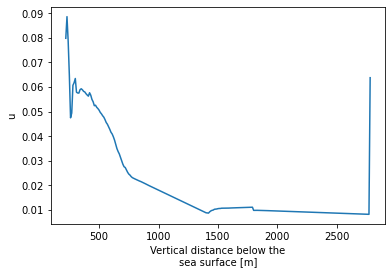

In [11]:
 MB.u.mean('TIME').plot()

/opt/conda/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


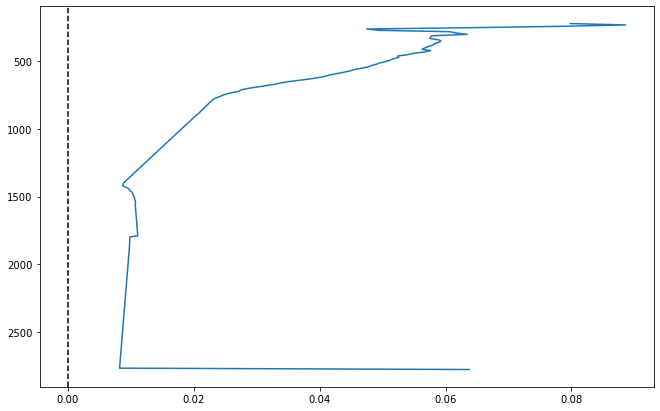

In [14]:
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(MB.u.mean('TIME'),MB.DEPTH)
ax.axvline(0, color='k', linestyle = '--')
ax.invert_yaxis()

In [41]:
np.isnan(ue1).any().values

array(True)

In [11]:
dyp = grid.depth.isel(x=slice(200,1400),y=slice(650,1800))

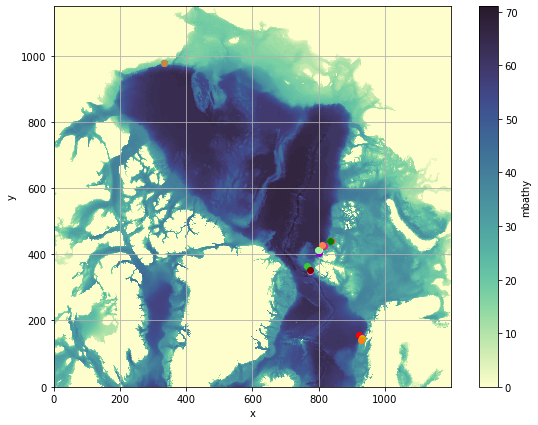

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap(cmocean.cm.deep))
for i,p in enumerate(moor_l):
    ax.plot(p[0], p[1], marker='o', color=c_list[i])
ax.grid('on')
ax.set_aspect('equal')
#plt.savefig('mooring_location_level.pdf', dpi = 300)

In [13]:
vel_l = [(u13,v13),(u15,v15),(u17,v17), 
         (ub,vb),(uw,vw),(un,vn),(us,vs),
         (u1,v1),(u2,v2),(u3,v3)
         ,(u14,v14),(u16,v16),(u18,v18),
         (ue1,ve1),(uw1,vw1),(ue2,ve2),(uw2,vw2),(ue3,ve3),(uw3,vw3)]

In [43]:
def ellipser_nDEPTH(u,v,depth):
    
    u = u.isel(TIME=slice(4,-1))
    v = v.isel(TIME=slice(4,-1))
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])
    minor = np.sqrt(np.abs(values[1]))

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
    return major, minor, theta, vectors

In [44]:
def ellipser_DEPTH(u,v,depth):
    
    u = u.isel(TIME=slice(4,-1))
    v = v.isel(TIME=slice(4,-1))
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

In [45]:
def ellipser_BINDEPTH(u,v,depth):
    
    u = u.isel(TIME=slice(4,-1))
    v = v.isel(TIME=slice(4,-1))
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta, vectors

## Mooring Barents sea

In [16]:
#u.DEPTH.isel(TIME=50,nDEPTH=10).values

[[332.39007543 -33.16522912]
 [-33.16522912 438.64949726]]
vec:  [[ 0.27541674 -0.96132493]
 [-0.96132493 -0.27541674]] val:  [448.15123695 322.88833574]
0.54
Ellipse(xy=(836, 440), width=42.339165648393475, height=35.93818780853956, angle=-74.01314941416945)
[[271.87860277 -13.55415113]
 [-13.55415113 340.75053557]]
vec:  [[ 0.1863939 -0.9824751]
 [-0.9824751 -0.1863939]] val:  [343.32201159 269.30712674]
0.53
Ellipse(xy=(838, 440), width=37.05790126771052, height=32.8211594397052, angle=-79.25758907730533)
[[347.16445786 -35.7823527 ]
 [-35.7823527  406.29518142]]
vec:  [[ 0.42605245 -0.90469846]
 [-0.90469846 -0.42605245]] val:  [423.14627558 330.3133637 ]
0.53
Ellipse(xy=(836, 439), width=41.141039149668, height=36.349050259825155, angle=-64.78270179177487)


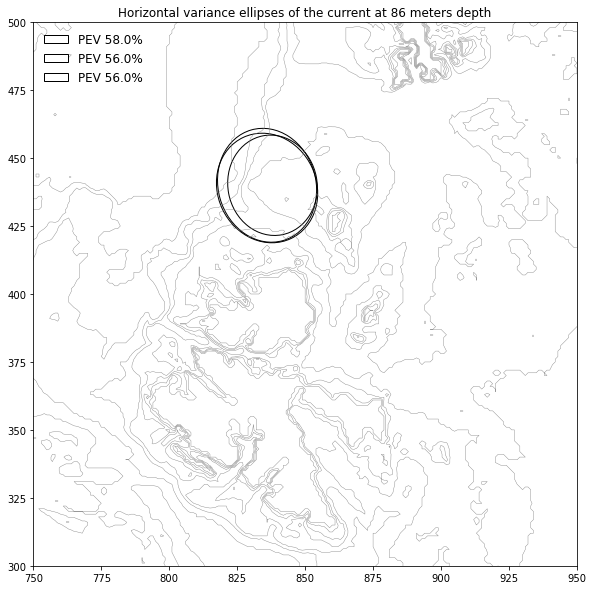

In [17]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 86 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [0,1,2]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 10
    
    maj_, min_, theta_, vec = ellipser_nDEPTH(u,v,depth)
    PVE = round((maj_**2/(maj_**2+ min_**2))*100,0) 
    velocity = round((maj_/(maj_+ min_)),2) 
    print(velocity)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label= f'PEV {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(750,950)
ax.set_ylim(300,500)
ax.set_aspect('equal')
plt.savefig('moor_barents_ellipse.pdf', dpi = 300)

## Moorings in Lofoten basin

In [21]:
vel_l[4][1].values

array([[0.14489557, 0.1133438 , 0.10099409, ..., 0.03293914, 0.03349525,
        0.03405136],
       [0.04538202, 0.1232433 , 0.10077713, ..., 0.02190525, 0.02227998,
        0.02265471],
       [0.02676809, 0.03206929, 0.00028196, ..., 0.00881281, 0.00895334,
        0.00909386],
       ...,
       [0.05252495, 0.10131266, 0.05729402, ..., 0.09379316, 0.09510564,
        0.09641812],
       [0.07417474, 0.10255295, 0.05876153, ..., 0.10341373, 0.10427674,
        0.10513975],
       [0.06769505, 0.06914136, 0.12556576, ..., 0.11023082, 0.11093193,
        0.11163304]])

3
[[ 0.00616119 -0.00059685]
 [-0.00059685  0.0054571 ]]
vec:  [[ 0.86834446  0.49596158]
 [-0.49596158  0.86834446]] val:  [0.00650209 0.0051162 ]
4
[[0.00177767 0.00190658]
 [0.00190658 0.0030672 ]]
vec:  [[-0.58294305 -0.81251301]
 [-0.81251301  0.58294305]] val:  [0.00443508 0.00040979]


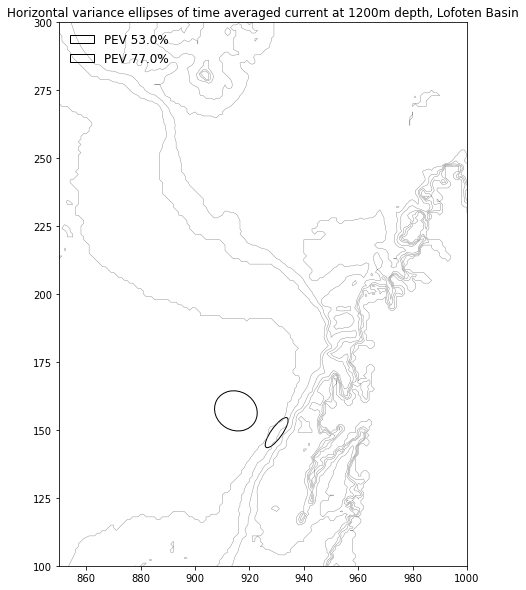

In [19]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 1200m depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 100
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0) 
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PEV {PVE}%'
                     )
    ax.add_patch(ellipse)
    vec_l.append(vec)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()
#plt.savefig('moor_Lofoten_ellipse.pdf', dpi = 300)

In [20]:
vel_l[5][0].DEPTH[45].values

array(600.)

5
[[0.01975147 0.00869603]
 [0.00869603 0.0095047 ]]
vec:  [[ 0.86822067 -0.49617826]
 [ 0.49617826  0.86822067]] val:  [0.02472115 0.00453501]
6
[[0.01948174 0.01234974]
 [0.01234974 0.01481561]]
vec:  [[ 0.76994574 -0.63810937]
 [ 0.63810937  0.76994574]] val:  [0.02971686 0.00458049]


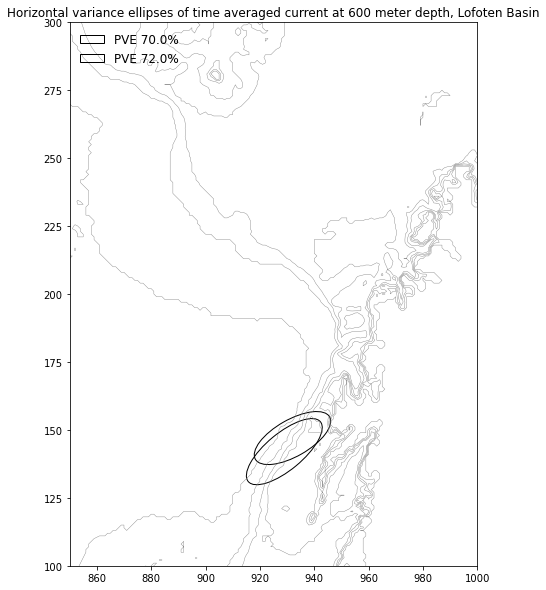

In [32]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 600 meter depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [5,6]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 40
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0) 
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    #vec_l.append(vec)
    
ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()

In [22]:
vec_l

[array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
 array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
 array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
 array([[ 0.86834446,  0.49596158],
        [-0.49596158,  0.86834446]]),
 array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
 array([[ 0.94829195, -0.3173994 ],
        [ 0.3173994 ,  0.94829195]])]

3
[[0.00775443 0.00095931]
 [0.00095931 0.01624426]]
vec:  [[-0.11089982 -0.99383159]
 [-0.99383159  0.11089982]] val:  [0.01635131 0.00764739]
4
[[0.00881811 0.00796697]
 [0.00796697 0.01378123]]
vec:  [[-0.5927104  -0.80541566]
 [-0.80541566  0.5927104 ]] val:  [0.01964417 0.00295517]
5
[[0.03314956 0.03006593]
 [0.03006593 0.03667354]]
vec:  [[-0.68611083 -0.72749703]
 [-0.72749703  0.68611083]] val:  [0.06502907 0.00479404]
6
[[0.0322705  0.02081542]
 [0.02081542 0.0286371 ]]
vec:  [[ 0.73720624 -0.67566779]
 [ 0.67566779  0.73720624]] val:  [0.05134835 0.00955925]


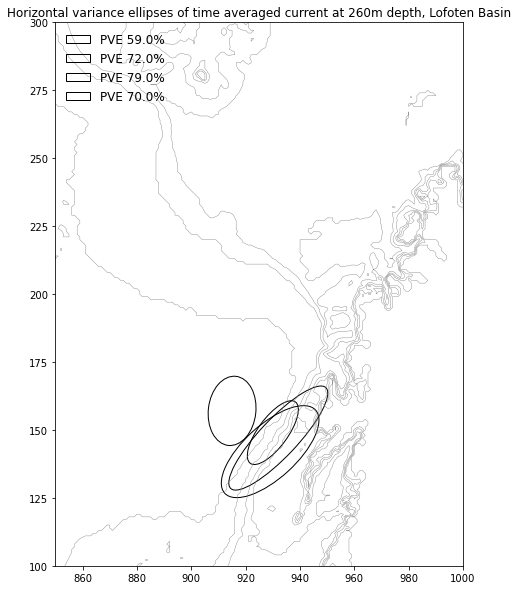

In [63]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 260m depth, Lofoten Basin')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4,5,6]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 0
    
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 

ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.savefig('moor_Lofoten_ellipse.pdf', dpi = 300)

## Moorings Yermark

In [23]:
vel_l[9][0].DEPTH[140].values

array(745.66019418)

7
[[ 0.01732654 -0.0006705 ]
 [-0.0006705   0.01761845]]
vec:  [[ 0.62741291 -0.77868674]
 [-0.77868674 -0.62741291]] val:  [0.01815869 0.0167863 ]
Ellipse(xy=(774, 350), width=26.950840095171984, height=25.91238748354795, angle=-51.14049108908952)
8
[[0.0162784  0.0011626 ]
 [0.0011626  0.01695075]]
vec:  [[-0.60092325 -0.79930673]
 [-0.79930673  0.60092325]] val:  [0.0178248  0.01540435]
Ellipse(xy=(766, 364), width=26.701910564670868, height=24.82285245816764, angle=-126.93604896302391)
9
[[ 0.01404945 -0.00123508]
 [-0.00123508  0.01460441]]
vec:  [[ 0.62481889 -0.78076972]
 [-0.78076972 -0.62481889]] val:  [0.0155928  0.01306107]
Ellipse(xy=(773, 352), width=24.974223296179225, height=22.857005736354676, angle=-51.331104081926)


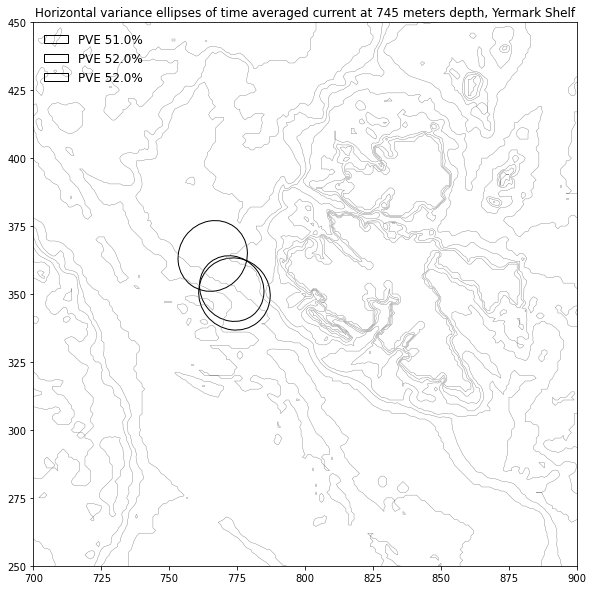

In [24]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 745 meters depth, Yermark Shelf')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [7,8,9]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 42

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(700,900)
ax.set_ylim(250,450)
ax.set_aspect('equal')
plt.savefig('moor_yermark_ellipse262m.pdf', dpi = 300)

In [78]:
len(moor_l)

19

## North of Svalbard

In [93]:
vel_l[15][0].DEPTH[45].values

array(500.)

13
[[0.01041693 0.00057994]
 [0.00057994 0.00221814]]
vec:  [[ 0.9975322  -0.07021048]
 [ 0.07021048  0.9975322 ]] val:  [0.01045775 0.00217732]
Ellipse(xy=(817, 425), width=20.452625050406684, height=9.332353513387542, angle=4.026076638036269)
14
[[0.00724803 0.00061386]
 [0.00061386 0.0047899 ]]
vec:  [[ 0.9732993  -0.22953971]
 [ 0.22953971  0.9732993 ]] val:  [0.0073928  0.00464513]
Ellipse(xy=(800, 405), width=17.196283702179855, height=13.631042076685635, angle=13.269974299736319)


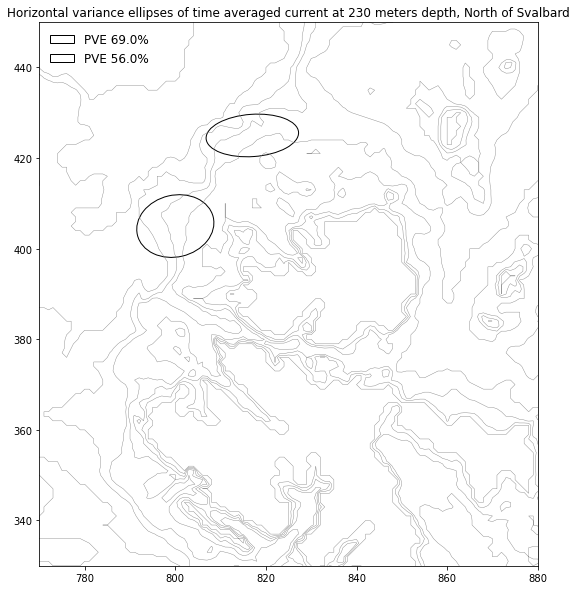

In [91]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 230 meters depth, North of Svalbard')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [13,14]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 20

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(770,880)
ax.set_ylim(330,450)
ax.set_aspect('equal')
plt.savefig('moor_nord-svalbard_ellipse230m.pdf', dpi = 300)

15
[[0.00889827 0.00012792]
 [0.00012792 0.00316107]]
vec:  [[ 0.99975175 -0.0222807 ]
 [ 0.0222807   0.99975175]] val:  [0.00890112 0.00315822]
Ellipse(xy=(810, 425), width=18.869154631729163, height=11.239606397262607, angle=1.2766957566417236)
16
[[0.00867492 0.00184415]
 [0.00184415 0.00699233]]
vec:  [[ 0.84114404 -0.54081116]
 [ 0.54081116  0.84114404]] val:  [0.00986061 0.00580664]
Ellipse(xy=(802, 413), width=19.860119218568357, height=15.240260645307629, angle=32.73887480675065)
17
[[ 0.0050913  -0.00020596]
 [-0.00020596  0.00307337]]
vec:  [[ 0.99493596  0.10051086]
 [-0.10051086  0.99493596]] val:  [0.00511211 0.00305256]
Ellipse(xy=(810, 427), width=14.299806031352855, height=11.050001876671047, angle=-5.768588558337188)
18
[[0.00456831 0.00020686]
 [0.00020686 0.00323965]]
vec:  [[ 0.98863153 -0.15035855]
 [ 0.15035855  0.98863153]] val:  [0.00459977 0.00320819]
Ellipse(xy=(797, 414), width=13.564321954527278, height=11.328180278284163, angle=8.647705744553978)


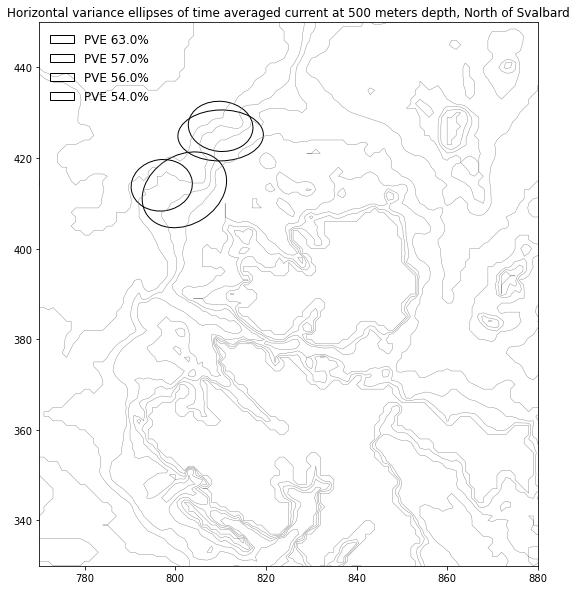

In [95]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of time averaged current at 500 meters depth, North of Svalbard')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [15,16,17,18]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 45

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_, vec = ellipser_DEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left") 
    
ax.set_xlim(770,880)
ax.set_ylim(330,450)
ax.set_aspect('equal')
plt.savefig('moor_north-Svalbard_500m.pdf', dpi = 300)

In [96]:
vec_l

[array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
 array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
 array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
 array([[ 0.86834446,  0.49596158],
        [-0.49596158,  0.86834446]]),
 array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
 array([[ 0.86822067, -0.49617826],
        [ 0.49617826,  0.86822067]]),
 array([[ 0.76994574, -0.63810937],
        [ 0.63810937,  0.76994574]]),
 array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
 array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
 array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
 array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
 array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
 array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]]),
 array([[ 0.9975322 , -0.07021048],
      

## Moorings Beaufort sea

In [25]:
vel_l[12][0].BINDEPTH[9].values

array(92.4995, dtype=float32)

[[ 0.02942318 -0.02255391]
 [-0.02255391  0.022193  ]]
vec:  [[ 0.76100801  0.64874249]
 [-0.64874249  0.76100801]] val:  [0.04864989 0.00296629]
Ellipse(xy=(334, 978), width=44.1134401505896, height=10.892732030977838, angle=-40.44685780260724)
[[ 0.02924355 -0.02042314]
 [-0.02042314  0.01726024]]
vec:  [[ 0.80047202  0.59937012]
 [-0.59937012  0.80047202]] val:  [0.0445358  0.00196799]
Ellipse(xy=(334, 978), width=42.207013554573805, height=8.872401432243882, angle=-36.82479923024254)
[[ 0.03236038 -0.01516241]
 [-0.01516241  0.00932714]]
vec:  [[ 0.89578352  0.44449059]
 [-0.44449059  0.89578352]] val:  [0.03988401 0.00180351]
Ellipse(xy=(334, 978), width=39.94196509907251, height=8.493542278004975, angle=-26.390751329701658)


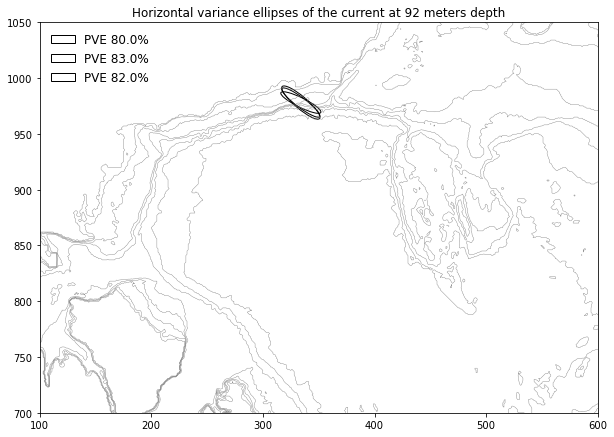

In [26]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at 92 meters depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [10,11,12]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2

    maj_, min_, theta_, vec = ellipser_BINDEPTH(u,v,depth)
    PVE = round((maj_)/(maj_+min_)*100,0)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='k',
            label = f'PVE {PVE}%'
                     )
    print(ellipse)
    vec_l.append(vec)
    ax.add_patch(ellipse)
    ax.legend(frameon=False, fontsize=12, loc="upper left")

ax.set_xlim(100,600)
ax.set_ylim(700,1050)
ax.set_aspect('equal')
plt.savefig('moor_beaufort_ellipse.pdf', dpi = 300)

In [27]:
vec_l

[array([[ 0.27541674, -0.96132493],
        [-0.96132493, -0.27541674]]),
 array([[ 0.1863939, -0.9824751],
        [-0.9824751, -0.1863939]]),
 array([[ 0.42605245, -0.90469846],
        [-0.90469846, -0.42605245]]),
 array([[ 0.86834446,  0.49596158],
        [-0.49596158,  0.86834446]]),
 array([[-0.58294305, -0.81251301],
        [-0.81251301,  0.58294305]]),
 array([[ 0.94829195, -0.3173994 ],
        [ 0.3173994 ,  0.94829195]]),
 array([[ 0.62741291, -0.77868674],
        [-0.77868674, -0.62741291]]),
 array([[-0.60092325, -0.79930673],
        [-0.79930673,  0.60092325]]),
 array([[ 0.62481889, -0.78076972],
        [-0.78076972, -0.62481889]]),
 array([[ 0.76100801,  0.64874249],
        [-0.64874249,  0.76100801]]),
 array([[ 0.80047202,  0.59937012],
        [-0.59937012,  0.80047202]]),
 array([[ 0.89578352,  0.44449059],
        [-0.44449059,  0.89578352]])]

# Vertical PC

In [46]:
def PCz(data):
    cov = np.cov(data.isel(TIME=slice(4,-1)).T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors 

In [47]:
def PCz_op(up,vp,vec):
        
    p = up.isel(TIME=slice(4,-1))*vec[0] +  vp.isel(TIME=slice(4,-1))*vec[1]
    o = -up.isel(TIME=slice(4,-1))*vec[1] +  vp.isel(TIME=slice(4,-1))*vec[0]

    val_p, vec_p = PCz(p) 
    val_o, vec_o = PCz(o) 
    
    EOFp = (np.sqrt(val_p[0])*vec_p[:,0])
    EOFo = (np.sqrt(val_o[0])*vec_o[:,0])
    
    PVEp = int(round(val_p[0]/np.sum(val_p)*100,0))
    PVEo = int(round(val_o[0]/np.sum(val_o)*100,0))
    
    return EOFp, EOFo, PVEp, PVEo

In [24]:
vel_l[0][0].values

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [-26.21363317, -21.73281839, -23.29934273, ...,   6.38716915,
          5.16065904,   6.57064144],
       [-23.83475008, -19.94649833, -23.04086311, ...,   8.18927267,
          7.02389408,   6.54719859],
       [-21.09521143, -19.25943058, -21.63604272, ...,  10.55573986,
         10.9031989 ,   8.50753711]])

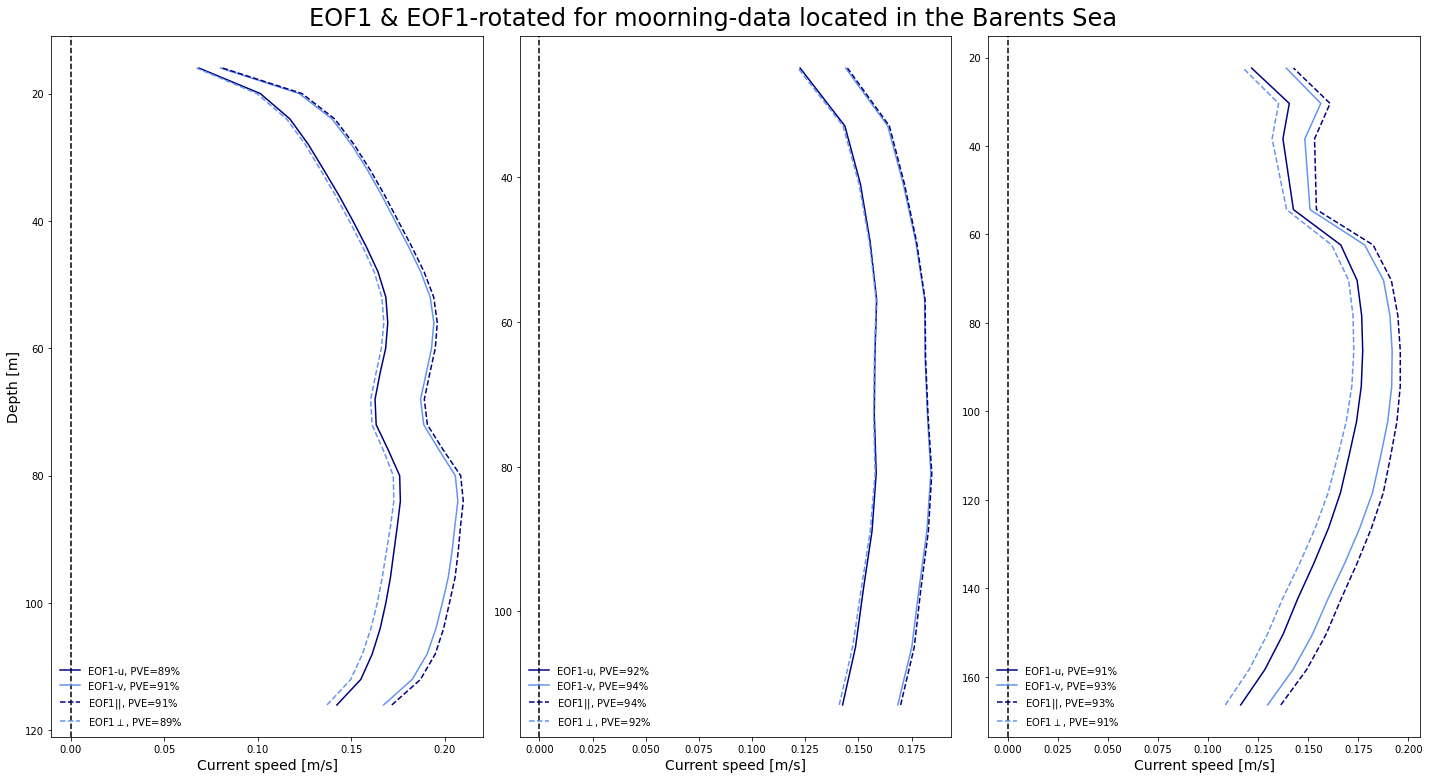

In [48]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, [0,1,2]):
    U = vel_l[i][0]*10**(-2)
    V = vel_l[i][1]*10**(-2)
    vec = vec_l[i][:,0]
    EOFp, EOFo, PVEp, PVEo, = PCz_op(U,V,vec)
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH.isel(TIME=0), label= f'EOF1-u, PVE={PVE1u}%', color='navy')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH.isel(TIME=0), label= f'EOF1-v, PVE={PVE1v}%', color='cornflowerblue')
    axs.plot(EOFp,U.DEPTH.isel(TIME=0), linestyle= '--',label= f'EOF1$||$, PVE={PVEp}%', color='navy')
    axs.plot(EOFo,V.DEPTH.isel(TIME=0), linestyle= '--',label= f'EOF1$\perp$, PVE={PVEo}%', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 
fig.tight_layout()

plt.savefig('EOFs_moor_barents_5dsmooth.pdf', dpi = 300)

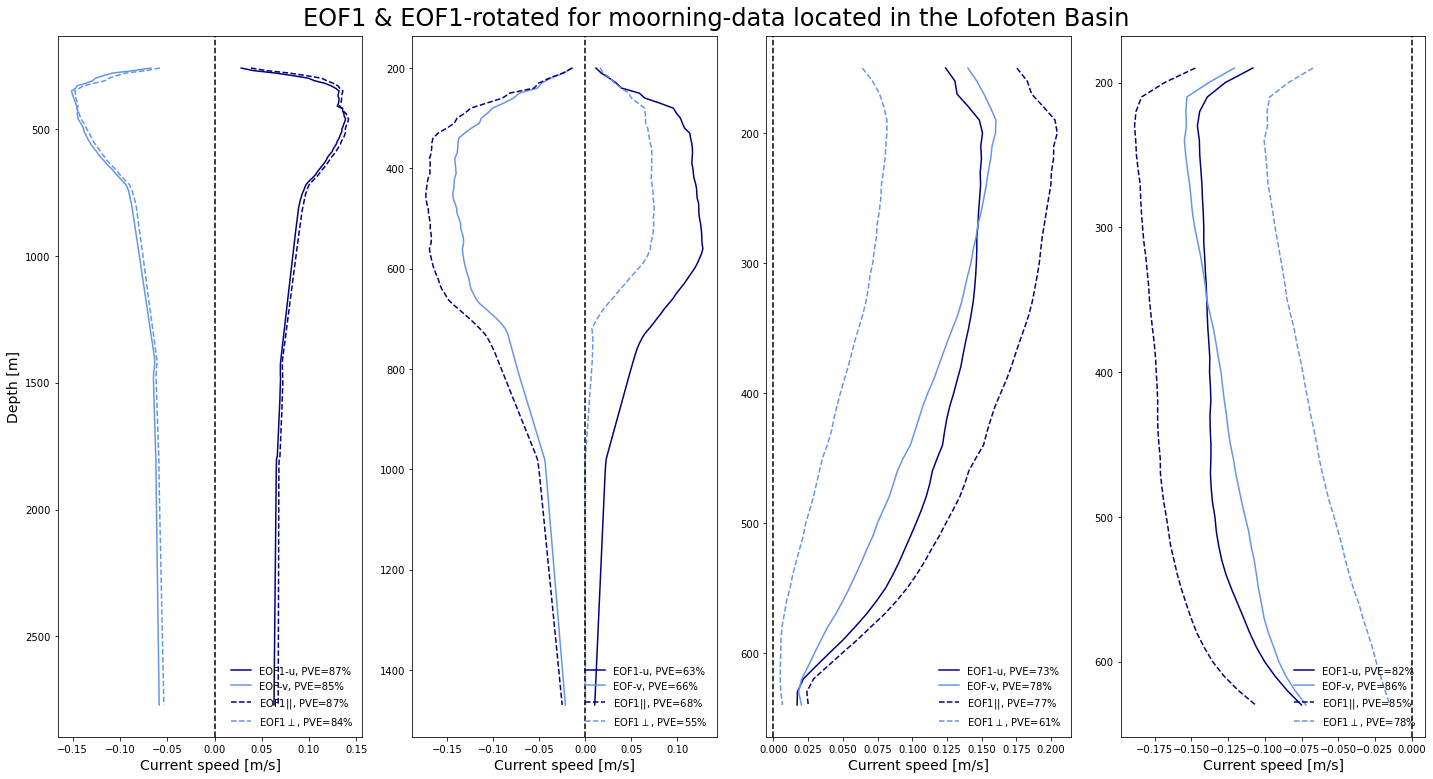

In [50]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(20,11))
plt.suptitle('EOF1 & EOF1-rotated for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)
nr = [3,4,5,6]
axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, [3,4,5,6]):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =vel_l[i][0]
    V = vel_l[i][1]
    vec = vec_l[i][:,0]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='navy')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cornflowerblue')
    EOFp, EOFo, PVEp, PVEo, = PCz_op(U,V,vec)
    axs.plot(EOFp,U.DEPTH, linestyle='--',label= f'EOF1$||$, PVE={PVEp}%', color='navy')
    axs.plot(EOFo,V.DEPTH, linestyle='--',label= f'EOF1$\perp$, PVE={PVEo}%', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower right")
fig.tight_layout()   

plt.savefig('EOFs_moor_Lofoten_5dsmooth.pdf', dpi = 300)

In [49]:
def PCz_yermark(data):
    cov = np.cov(data.isel(TIME=slice(4,-1)), bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

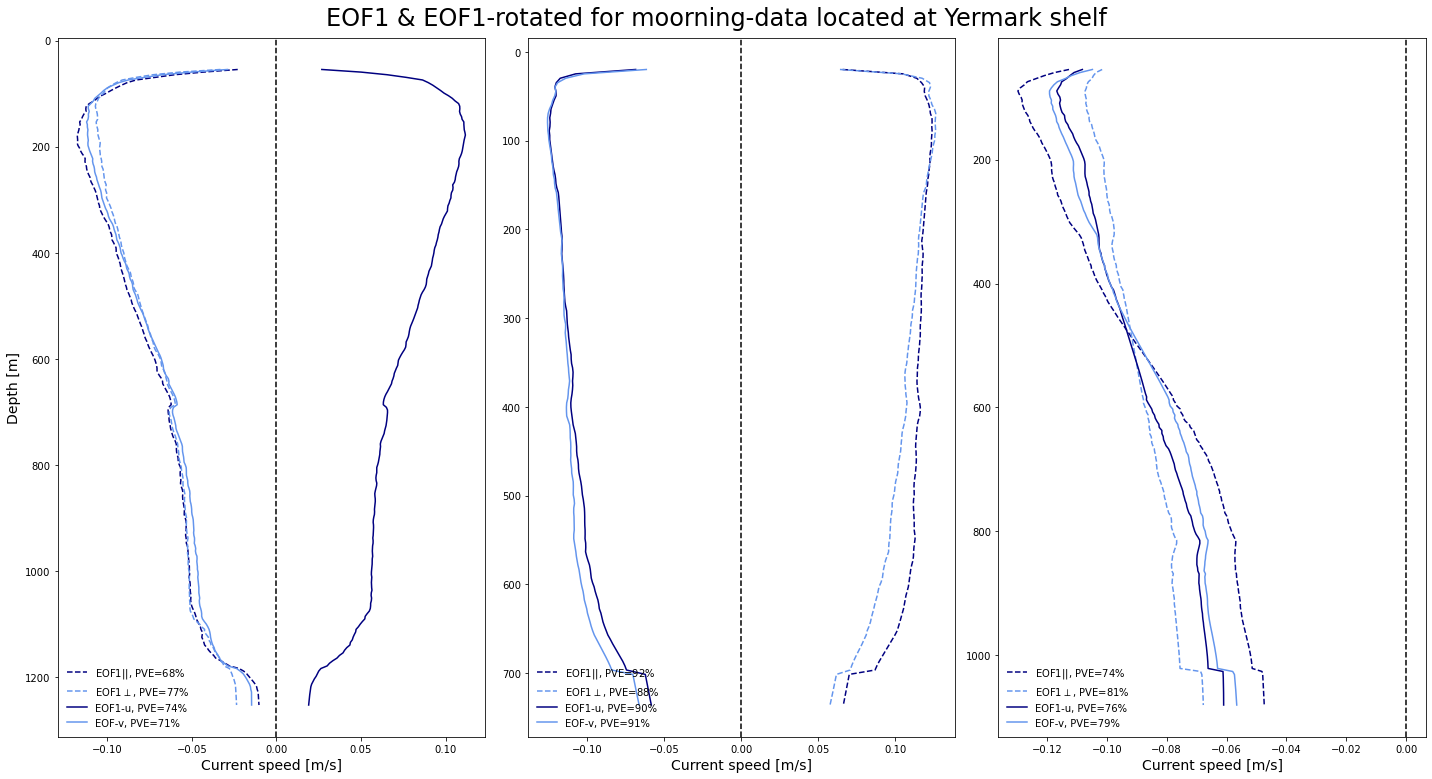

In [51]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF1 & EOF1-rotated for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, [7,8,9]):
    U =vel_l[i][0]
    V = vel_l[i][1]
    vec = vec_l[i][:,0]
    valu, vecu = PCz_yermark(U)
    valv, vecv = PCz_yermark(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    PC1p, PC1o, PVE1p, PVE1o = PCz_op(U.T,V.T,vec)
    axs.plot(PC1p,U.DEPTH, linestyle='--', label= f'EOF1$||$, PVE={PVE1p}%', color='navy')
    axs.plot(PC1o,V.DEPTH, linestyle='--', label= f'EOF1$\perp$, PVE={PVE1o}%', color='cornflowerblue')
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='navy')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 
fig.tight_layout()

plt.savefig('EOFs_moor_Yermark_5dsmooth.pdf', dpi = 300)

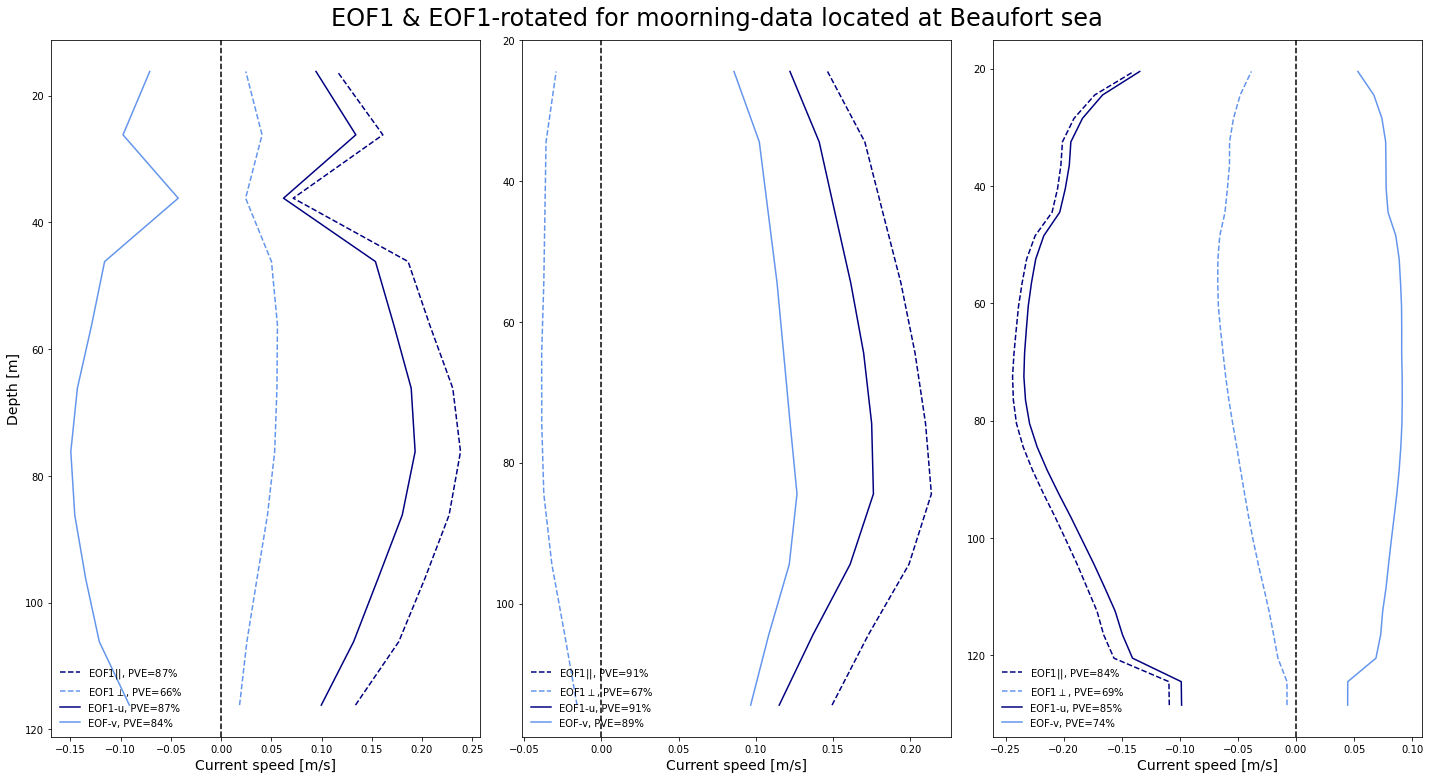

In [52]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,3,figsize=(20,11))
plt.suptitle('EOF1 & EOF1-rotated for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, [10,11,12]):
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec = vec_l[i][:,0]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    PC1p, PC1o, PVE1p, PVE1o = PCz_op(U,V,vec)
    axs.plot(PC1p,U.BINDEPTH, linestyle='--', label= f'EOF1$||$, PVE={PVE1p}%', color='navy')
    axs.plot(PC1o,V.BINDEPTH, linestyle='--', label= f'EOF1$\perp$, PVE={PVE1o}%', color='cornflowerblue')
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.BINDEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='navy')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.BINDEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 
fig.tight_layout()

plt.savefig('EOFs_moor_Beaufort_5dsmooth.pdf', dpi = 300)

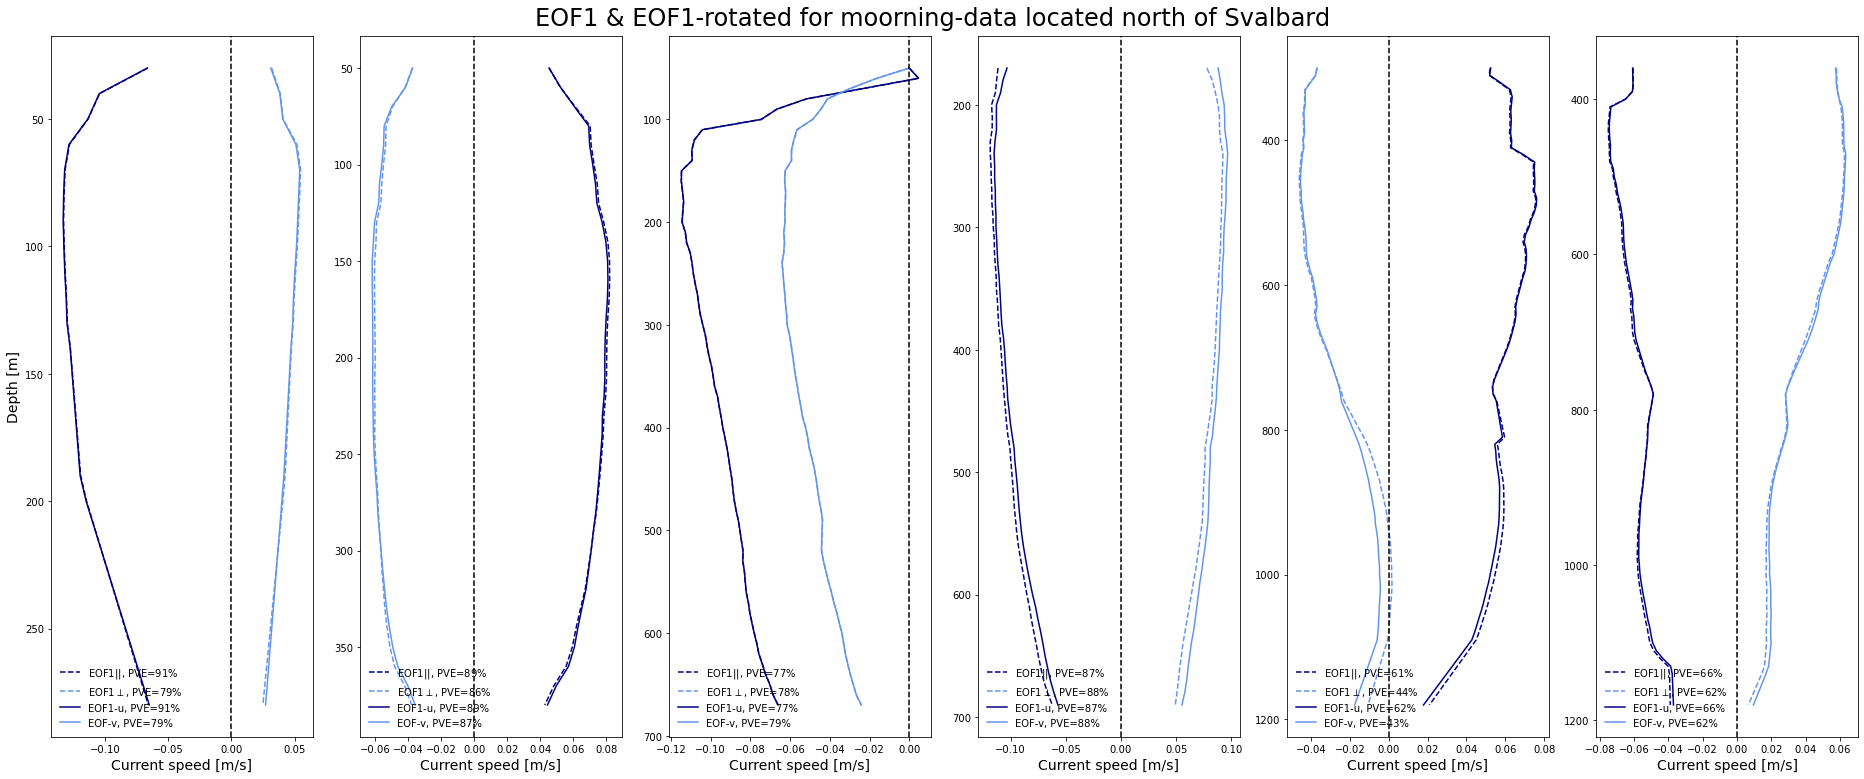

In [54]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,6,figsize=(26,11))
plt.suptitle('EOF1 & EOF1-rotated for moorning-data located north of Svalbard', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, [13,14,15,16,17,18]):
    U = vel_l[i][0]
    V = vel_l[i][1]
    vec = vec_l[i][:,0]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    PVE1u = int(round(valu[0]/np.sum(valu)*100,0))
    PVE1v = int(round(valv[0]/np.sum(valv)*100,0))
    PC1p, PC1o, PVE1p, PVE1o = PCz_op(U,V,vec)
    axs.plot(PC1p,U.DEPTH, linestyle='--', label= f'EOF1$||$, PVE={PVE1p}%', color='navy')
    axs.plot(PC1o,V.DEPTH, linestyle='--', label= f'EOF1$\perp$, PVE={PVE1o}%', color='cornflowerblue')
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= f'EOF1-u, PVE={PVE1u}%', color='navy')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= f'EOF-v, PVE={PVE1v}%', color='cornflowerblue')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Current speed [m/s]', fontsize=14)
    axs.legend(frameon=False, fontsize=10, loc="lower left") 
fig.tight_layout()

plt.savefig('EOFS_moors_NorthSvalbard_5dsmooth.pdf', dpi = 300)